# Task 1: Importing Libraries

In [1]:
%matplotlib notebook

import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt

# Task 2: Importing and Preprocessing Data

In [ ]:
(x_train, y_train), (x_test,y_test) = tf.keras.datasets.mnist.load_data()

x_train = np.reshape(x_train, (x_train.shape[0], 28*28))/255.
x_test = np.reshape(x_test, (x_test.shape[0], 28*28))/255.

y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

print(x_train.shape, y_train.shape)

# Task 3: Creating the Model

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.02),
              metrics=['accuracy'])

model.summary()

# Tasks 4 : Creating the Callback

In [2]:
class CustomCallback(tf.keras.callbacks.Callback):
    def __init__(self, fraction):
        super(CustomCallback, self).__init__()
        
        self.fraction = fraction
        self.train_a = []
        self.val_a = []
        
        with open('log.txt','w') as file:
            file.write("Start of logging")
            
        self.fig = plt.figure(figsize=(4, 3))
        self.ax = plt.subplot(1, 1, 1)
        plt.ion()
        
    def on_train_begin(self, logs=None):
        self.fig.show()
        self.fig.canvas.draw()
        
    def on_epoch_begin(self, epoch, logs=None):
        lr = tf.keras.backend.get_value(self.model.optimizer.lr)
        lr *= fraction
        tf.keras.backend.set_value(self.model.optimizer.lr, lr)
        with open('log.txt','a') as f:
            f.write('At epoch {:02d}, learning rate changed to {:.4f}'.format(epoch, lr))
            
    def on_epoch_end(self, epoch, logs=None):
        val_acc = logs.get('val_accuracy')
        train_acc = logs.get('accuracy')
        
        self.val_a.append(val_acc)
        self.train_a.append(train_acc)
        
        with open('log.txt', 'a') as f:
            f.write('At epoch {:02d}, training accuracy: {:.3f}, validation accuracy: {:.3f}'.format(epoch, train_acc, val_acc))
            
        self.ax.clear()
        self.ax.plot(range(1 + epoch), self.train_a, label='Training')
        self.ax.plot(range(1 + epoch), self.val_a, label='Validation')
        self.ax.set_xlabel('Epochs')
        self.ax.set_ylabel('Accuracy')
        self.ax.legend()
        self.fig.canvas.draw()
        
    def on_train_end(self, logs=None):
        with open('log.txt','a') as f:
            f.write('End of logging....\n')

# Task 6: Training the Model

<IPython.core.display.Javascript object>


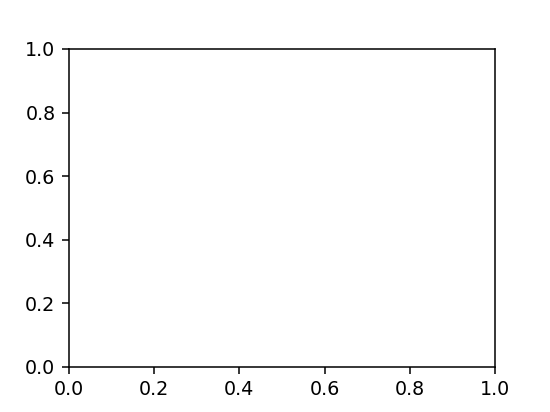

In [3]:
callback =  CustomCallback(fraction = 0.9)

In [ ]:
_ = model.fit(
    x_train, y_train,
    validation_data = (x_test, y_test),
    epochs=20, verbose=False,
    callbacks=[callback]
)